## Import libraries

In [170]:
#Basic Libraries
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime    
from pandas import Series 
import statsmodels.api as sm

#Visualization libraries
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
sns.set_style("whitegrid")
%matplotlib inline


from sklearn.metrics import mean_absolute_error, mean_squared_error

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [171]:
tatamotors=pd.read_csv("tata motors.csv")

In [172]:
tatamotors.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,03-01-2000,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448780e+13,NaN,NaN,NaN
1,04-01-2000,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422960e+13,NaN,NaN,NaN
2,05-01-2000,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357680e+13,NaN,NaN,NaN
3,06-01-2000,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435930e+13,NaN,NaN,NaN
4,07-01-2000,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197640e+13,NaN,NaN,NaN


In [173]:
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(tatamotors.shape))
print (tatamotors.info())

The shape of the  data is (row, column):(5306, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: f

In [174]:
#Checking out the statistical measures
tatamotors.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2.456000e+03,4.792000e+03,4792.000000
mean,409.432878,410.152752,417.122512,402.179438,409.451828,409.450264,409.761357,1.046560e+07,2.790772e+14,1.284400e+05,2.805962e+06,0.360529
std,272.483585,272.966475,277.018798,268.028297,272.516903,272.473264,272.491123,2.185034e+07,4.674351e+14,1.049546e+05,3.579713e+06,0.161659
min,58.800000,58.000000,60.700000,57.550000,58.750000,58.800000,59.240000,1.235100e+04,1.069380e+11,3.434000e+03,1.235100e+04,0.038500
25%,174.600000,174.762500,178.825000,171.012500,174.725000,174.600000,175.182500,1.668994e+06,7.049028e+13,7.547825e+04,6.469200e+05,0.227475
50%,377.250000,378.900000,384.750000,372.600000,377.525000,377.250000,378.465000,4.141648e+06,1.967415e+14,1.000340e+05,1.636752e+06,0.361350
75%,523.150000,523.475000,530.800000,515.912500,523.487500,523.150000,523.715000,8.706037e+06,3.175955e+14,1.420648e+05,3.761212e+06,0.483300
max,1365.150000,1361.000000,1382.000000,1347.000000,1362.000000,1365.150000,1362.150000,3.905778e+08,9.365670e+15,1.318669e+06,7.333848e+07,1.000000


### Converting Date into DateTime format

In [175]:
#Creating a copy
# Creating a copy of the DataFrame
tatamotors_copy = tatamotors.copy()

# Converting the 'Date' column to datetime data type
tatamotors_copy['Date'] = tatamotors_copy['Date'].apply(pd.to_datetime)

# Extracting Month, Week, Day, and Day of the week
tatamotors_copy["Month"] = tatamotors_copy.Date.dt.month
tatamotors_copy["Week"] = tatamotors_copy.Date.dt.isocalendar().week
tatamotors_copy["Day"] = tatamotors_copy.Date.dt.day
tatamotors_copy["Day of week"] = tatamotors_copy.Date.dt.dayofweek

# Setting the 'Date' column as the index
tatamotors_copy.set_index("Date", drop=False, inplace=True)

# Displaying the columns from index 15 to 18 (iloc[:,15:19])
tatamotors_copy.iloc[:, 15:19].head()


,Month,Week,Day,Day of week
Date,,,,
2000-03-01,3,9,1,2
2000-04-01,4,13,1,5
2000-05-01,5,18,1,0
2000-06-01,6,22,1,3
2000-07-01,7,26,1,5


In [176]:
tatamotors_copy.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Month,Week,Day,Day of week
Date,,,,,,,,,,,,,,,,,,,
2000-03-01,2000-03-01,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448780e+13,NaN,NaN,NaN,3,9,1,2
2000-04-01,2000-04-01,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422960e+13,NaN,NaN,NaN,4,13,1,5
2000-05-01,2000-05-01,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357680e+13,NaN,NaN,NaN,5,18,1,0
2000-06-01,2000-06-01,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435930e+13,NaN,NaN,NaN,6,22,1,3
2000-07-01,2000-07-01,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197640e+13,NaN,NaN,NaN,7,26,1,5


In [177]:
#Checking for null values
tatamotors_copy.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
Month                    0
Week                     0
Day                      0
Day of week              0
dtype: int64

In [178]:
#Imputing null values with mean 
tatamotors_copy.fillna(tatamotors_copy.mean(),inplace=True)

TypeError: Could not convert ['TELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTELCOTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORSTATAMOTORS'
 'EQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQEQ'] to numeric

### Plotting VWAP(Volume Weighted Average Price) over time

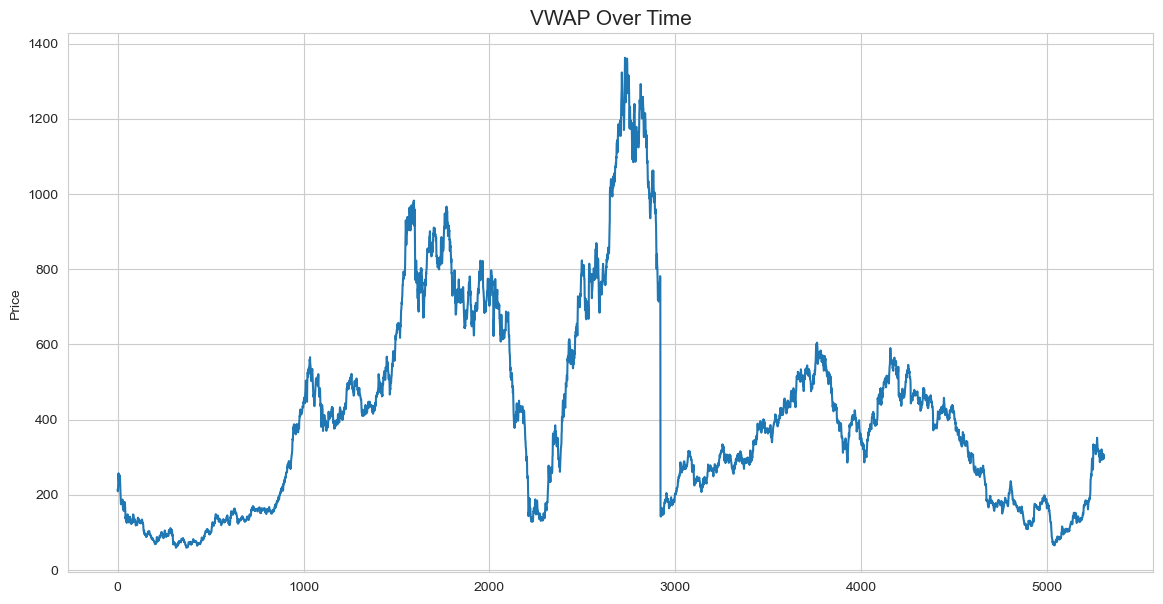

In [179]:
tatamotors.VWAP.plot(figsize=(14, 7))
plt.title('VWAP Over Time', fontsize=15)
plt.ylabel('Price');

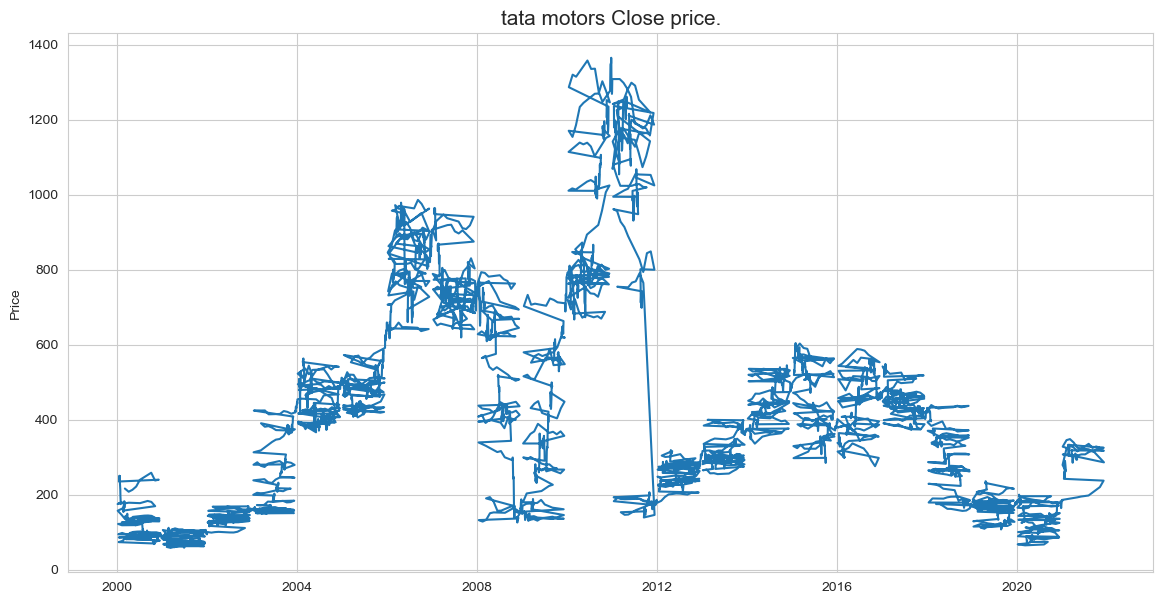

In [180]:
plt.figure(figsize=(14,7))
plt.plot(tatamotors_copy['Close'])
plt.title('tata motors Close price.', fontsize=15)
plt.ylabel('Price')
plt.show()

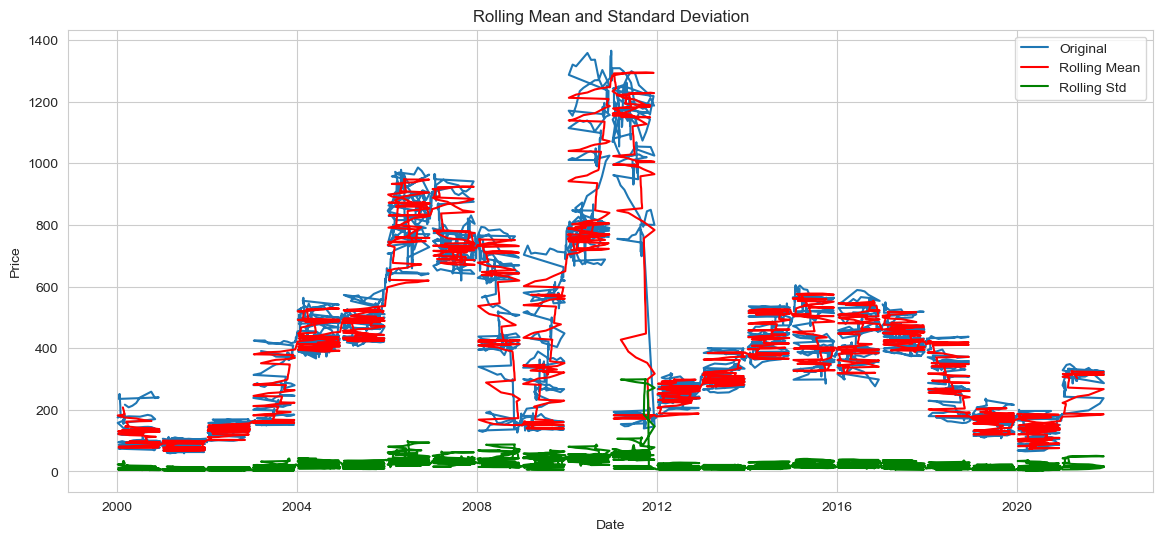

In [181]:
# Rolling mean and standard deviation
rolling_mean = tatamotors_copy['Close'].rolling(window=30).mean()
rolling_std = tatamotors_copy['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 6))
plt.plot(tatamotors_copy['Close'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='r')
plt.plot(rolling_std, label='Rolling Std', color='g')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

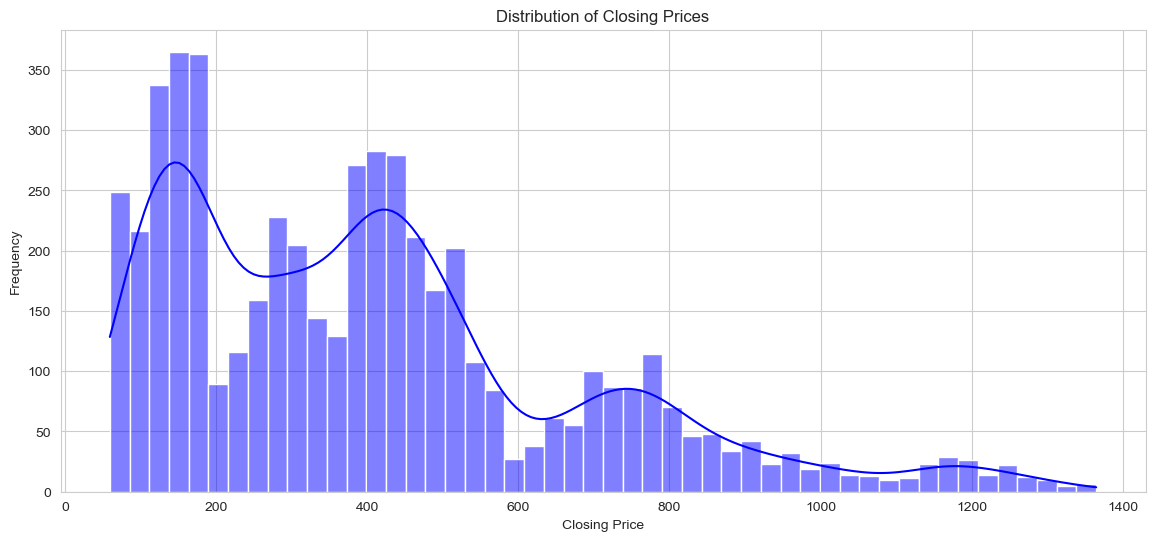

In [182]:
# Distribution plot of the closing prices
plt.figure(figsize=(14, 6))
sns.histplot(tatamotors_copy['Close'], kde=True, bins=50, color='blue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

### Open and Close Stock Price

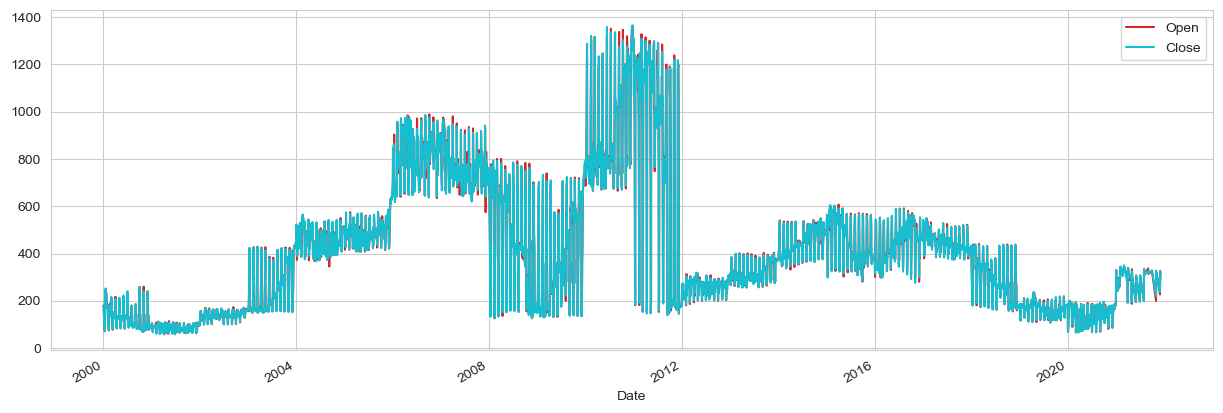

In [183]:
fig,ax = plt.subplots(figsize=(15,5))
tatamotors_copy.plot(ax=ax,x='Date',y='Open',color=color_pal[3])
tatamotors_copy.plot(ax=ax,x='Date',y='Close',color=color_pal[9])
plt.show()

### Open,close,High,low prices over time

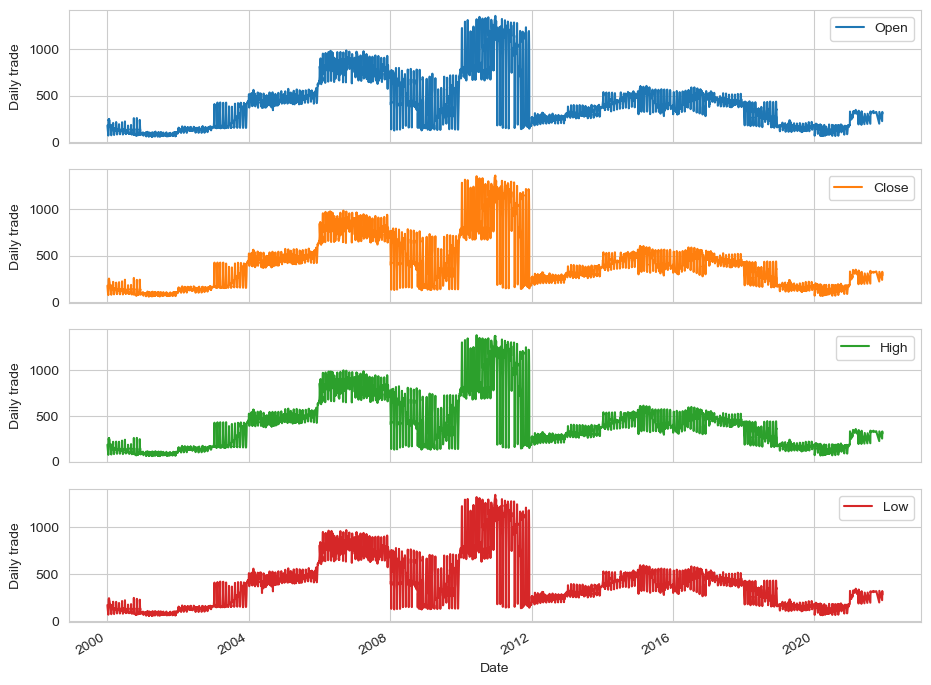

In [184]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = tatamotors_copy[cols_plot].plot(figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

### Volume over Time

In [185]:
fig = go.Figure([go.Scatter(x=tatamotors_copy.index, y=tatamotors_copy['Volume'])])
fig.update_layout(
    autosize=False,
    width=950,
    height=500,
    template='simple_white',
    title='Volume over time'
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Volume")
fig.show()

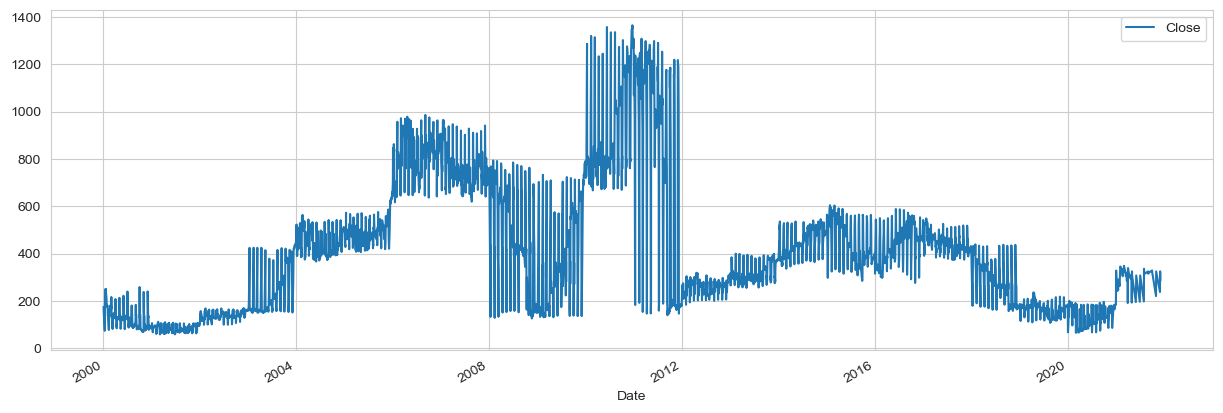

In [186]:
tatamotors_stationarity=tatamotors_copy[['Close']]

tatamotors_stationarity.plot(figsize=(15, 5), subplots=True);

From the plotted graph we can say that the data doesn't have a constant average as there are meany leaps and troughs and also the variance is also different at different stages of the data. So our data is not stationary. We can also mathematically test for stationarity with adfuller test

## Augmented Dickey Fuller Test

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

* Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
* Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [187]:
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(tatamotors_stationarity['Close'])

#Ho: Data is non stationary
#H1: Data is stationary

def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(tatamotors_stationarity['Close'])

ADF Test Statistic : -2.307609100599718
p-value : 0.16952562810863325
#Lags Used : 22
Number of Observations Used : 5283
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Since our p value is greater than 0.05 we need to accept the null hypothesis which states that our data is non-stationary.

* We don't actually need to convert the time series data into stationary data.

## Convert Stationary into Non Stationary

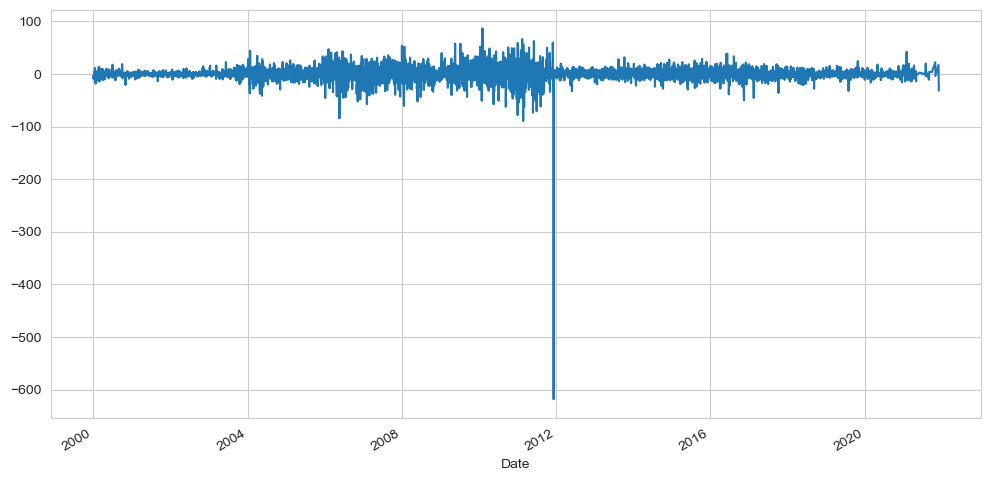

In [188]:
tatamotors_stationarity['Close First Difference']=tatamotors_stationarity['Close']-tatamotors_stationarity['Close'].shift(1)
tatamotors_stationarity['Close First Difference'].plot(figsize = (12,6));

### Seasonal Decompose

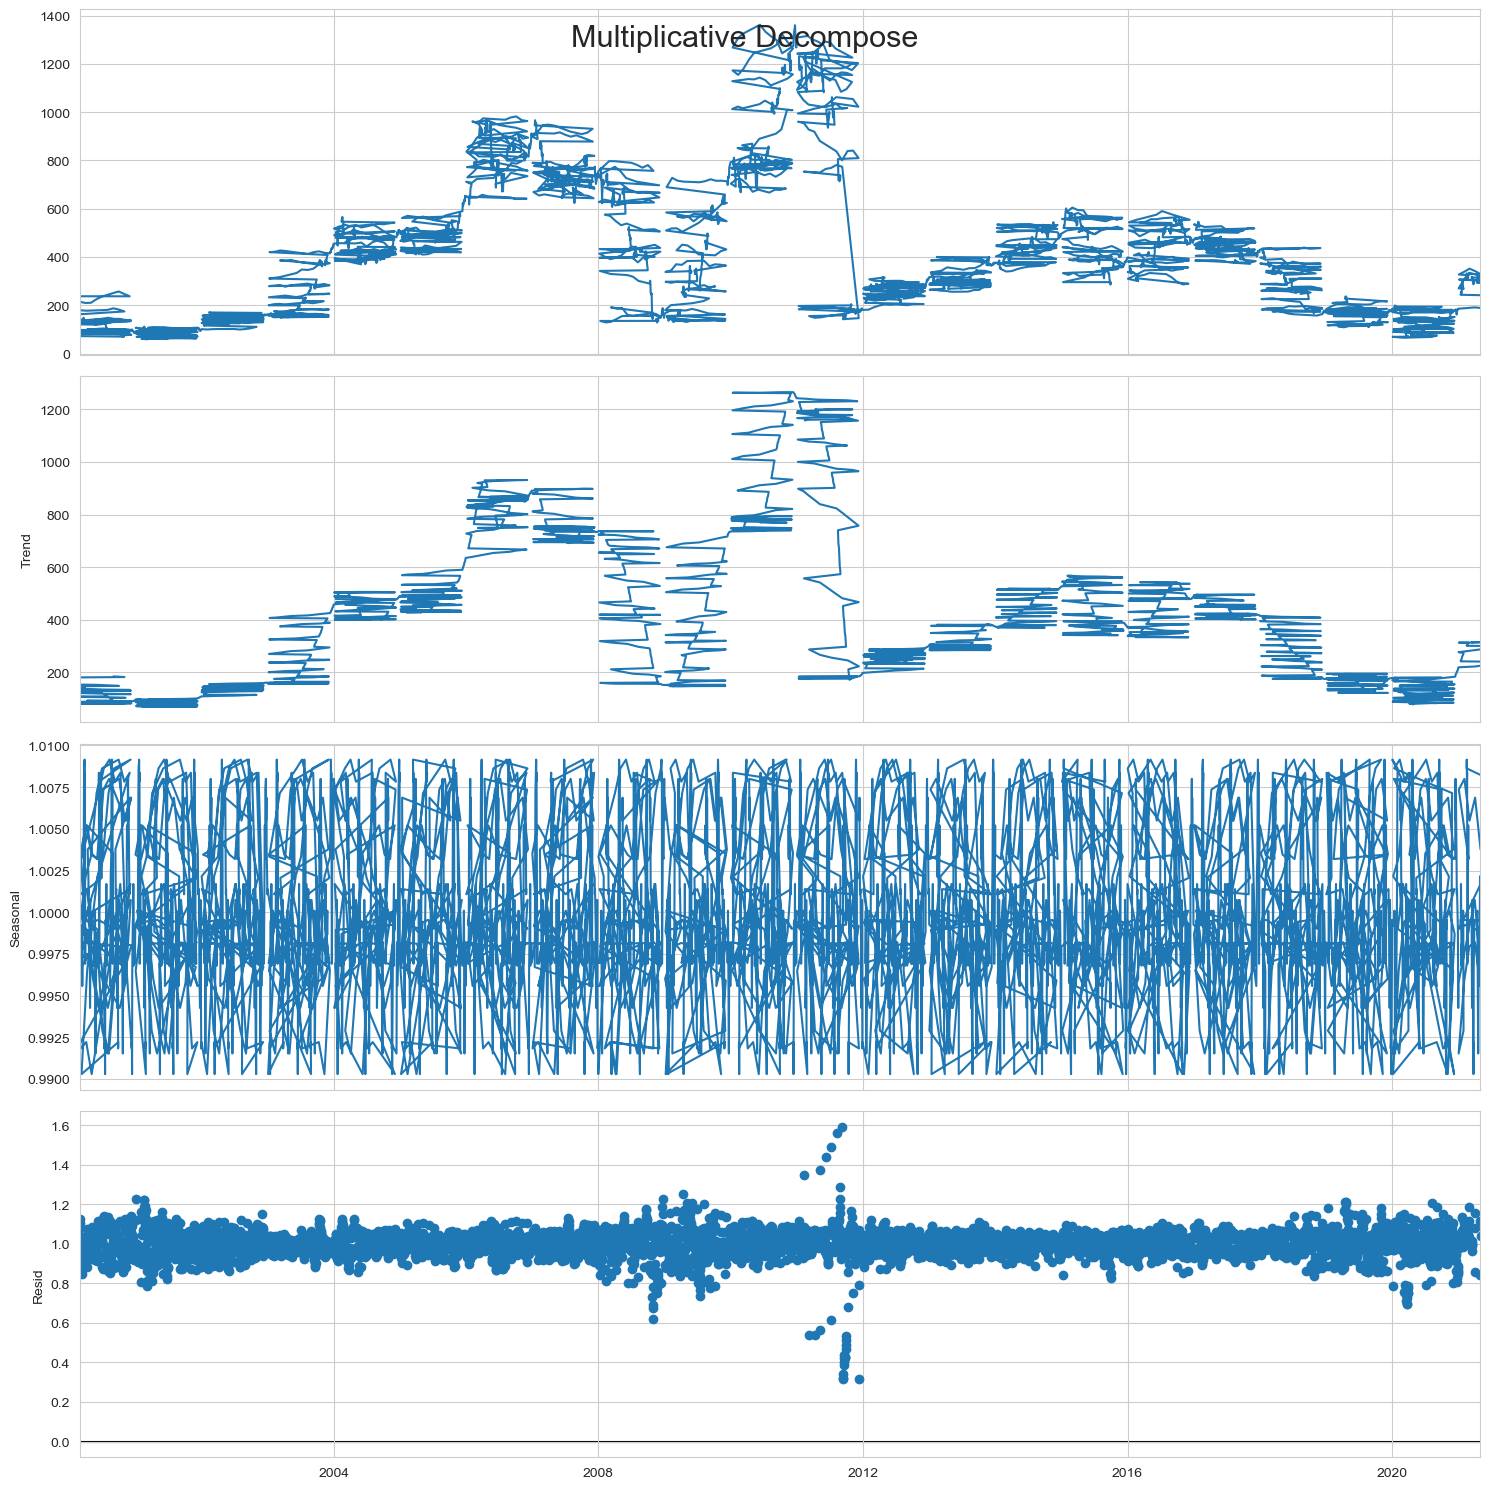

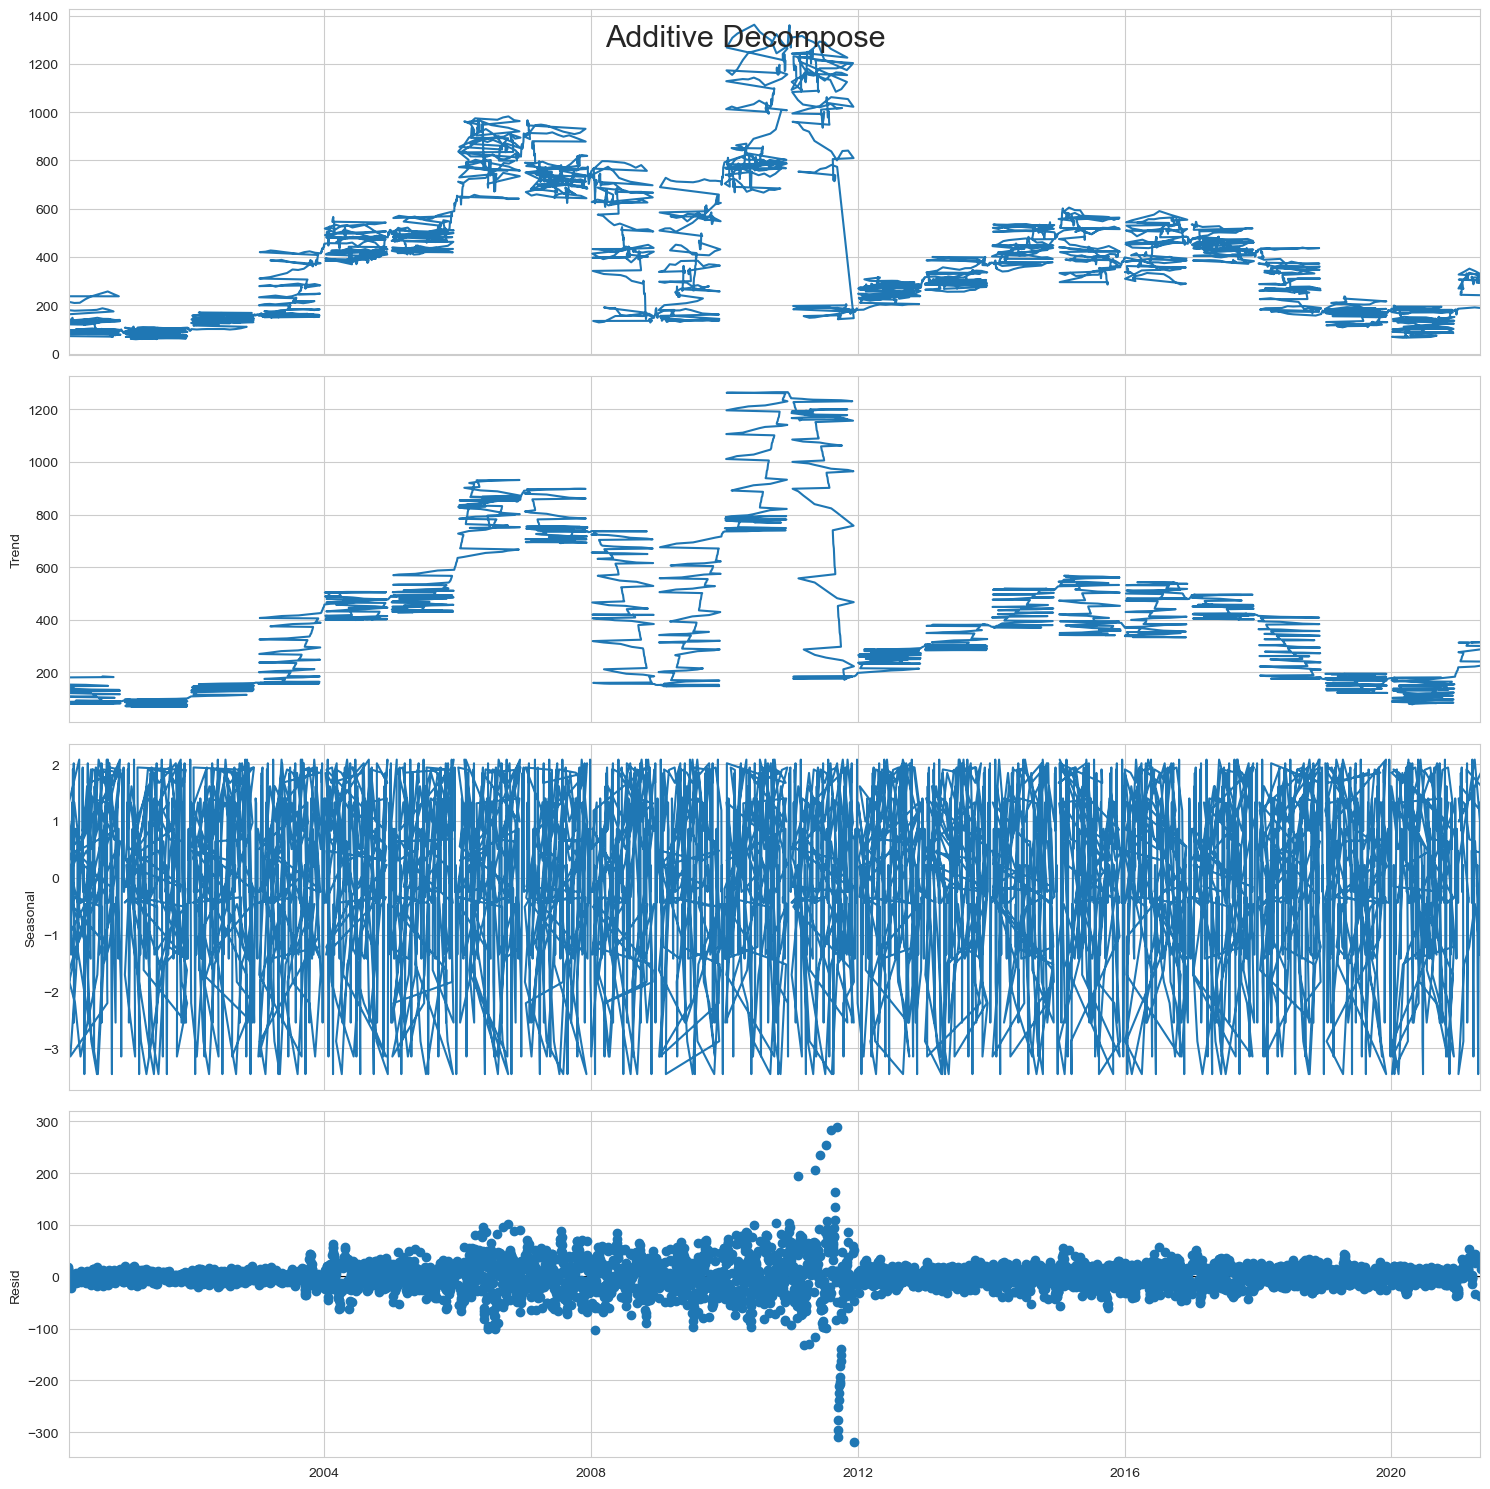

In [189]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (18,18)})
y = tatamotors_copy['VWAP'].to_frame()


# Multiplicative Decomposition 
result_mul = seasonal_decompose(y, model='multiplicative',period = 52)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',period = 52)

# Plot
plt.rcParams.update({'figure.figsize': (15,15)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

## Moving Average (MA)

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks or any time period the trader chooses.

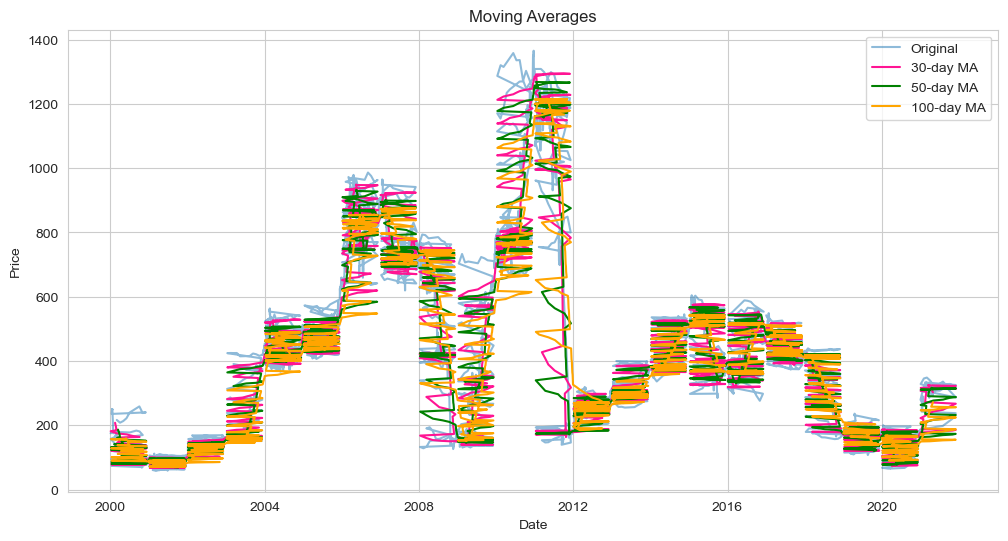

In [190]:
# Compute moving averages for 30, 50, and 100 days
tatamotors_copy['30_day_MA'] = tatamotors_copy['Close'].rolling(window=30).mean()
tatamotors_copy['50_day_MA'] = tatamotors_copy['Close'].rolling(window=50).mean()
tatamotors_copy['100_day_MA'] = tatamotors_copy['Close'].rolling(window=100).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(tatamotors_copy['Close'], label='Original', alpha=0.5)
plt.plot(tatamotors_copy['30_day_MA'], label='30-day MA', color='deeppink')
plt.plot(tatamotors_copy['50_day_MA'], label='50-day MA', color='green')
plt.plot(tatamotors_copy['100_day_MA'], label='100-day MA', color='orange')
plt.legend(loc='best')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Autocorrelation and Partial Autocorrelation

Auto-Correlation function gives us values of auto-correlation of any series with its lagged values. We plot these values along with the confidence band and tada! We have an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values.

Partial Auto-Correlation function- Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation.

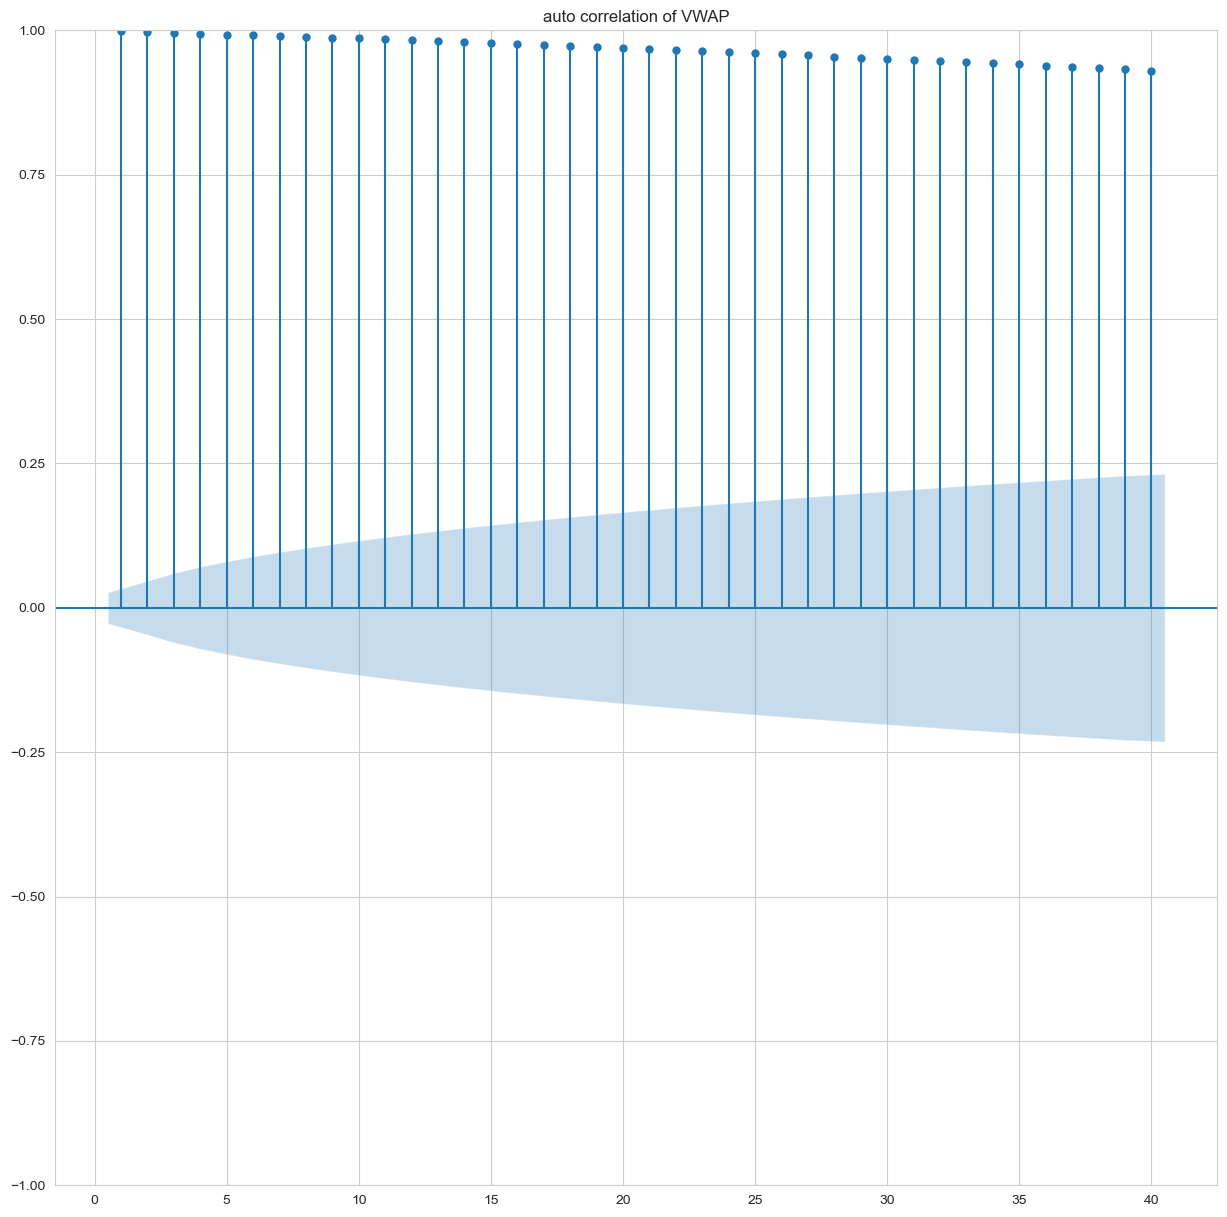

In [191]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(tatamotors_copy['VWAP'].iloc[1:], lags=40,title='auto correlation of VWAP',zero=False)
plt.show()

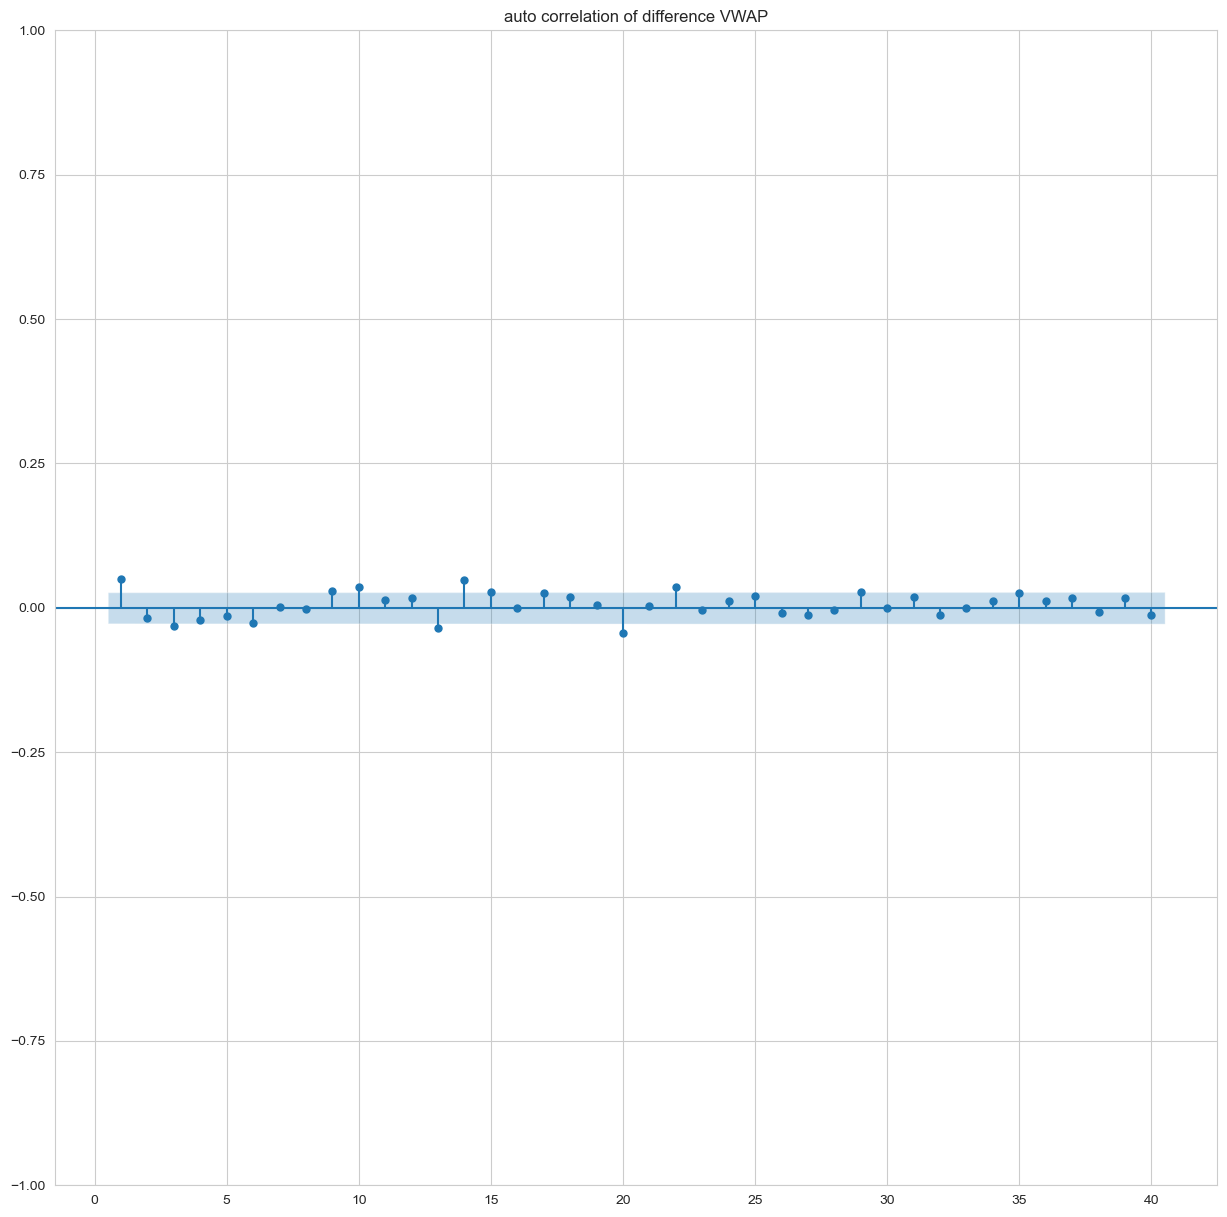

In [192]:
sm.graphics.tsa.plot_acf(tatamotors_stationarity['Close First Difference'].iloc[7:], lags=40,title='auto correlation of difference VWAP',zero=False)
plt.show()

## Linear Regression

In [193]:
tatamotors = tatamotors.reset_index()

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
tatamotors_lr= hdfc.copy()
tatamotors_lr.drop('Date', axis = 1, inplace = True)
tatamotors_lr.drop('Symbol', axis=1, inplace = True)
tatamotors_lr.drop('Series', axis=1, inplace = True)
tatamotors_lr.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1,inplace=True)
X = tatamotors_lr.drop('Close', axis=1)
y = tatamotors_lr['Close']


In [195]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
# Train the Linear Regression Model
model.fit(X_train, y_train)

LinearRegression()

In [196]:
np.isnan(X.values.any())

False

In [197]:
preds = model.predict(X_test)
from sklearn.metrics import r2_score

# Evaluate the model's accuracy
accuracy = r2_score(y_test, preds)
print("Accuracy:", accuracy)

Accuracy: 0.9999529131075541


In [198]:
tatamotors = pd.read_csv("tata motors.csv")
tatamotors.set_index("Date", drop=False, inplace=True)
tatamotors.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
03-01-2000,03-01-2000,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448780e+13,NaN,NaN,NaN
04-01-2000,04-01-2000,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422960e+13,NaN,NaN,NaN
05-01-2000,05-01-2000,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357680e+13,NaN,NaN,NaN
06-01-2000,06-01-2000,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435930e+13,NaN,NaN,NaN
07-01-2000,07-01-2000,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197640e+13,NaN,NaN,NaN


In [199]:
tatamotors.reset_index(drop=True, inplace=True)

In [200]:
import numpy as np

# ...

# Replace non-numeric values with NaN
tatamotors.replace(to_replace='?', value=np.nan, inplace=True)
tatamotors = tatamotors.apply(pd.to_numeric, errors='coerce')

# ...

tatamotors.fillna(tatamotors.mean(), inplace=True)

# ...

lag_features = ["High", "Low", "Volume", "Turnover", "Trades"]
window1 = 3
window2 = 7
window3 = 30

tatamotors_rolled_3d = tatamotors[lag_features].rolling(window=window1, min_periods=0)
tatamotors_rolled_7d = tatamotors[lag_features].rolling(window=window2, min_periods=0)
tatamotors_rolled_30d = tatamotors[lag_features].rolling(window=window3, min_periods=0)

tatamotors_mean_3d = tatamotors_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
tatamotors_mean_7d = tatamotors_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
tatamotors_mean_30d = tatamotors_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

tatamotors_std_3d = tatamotors_rolled_3d.std().shift(1).reset_index().astype(np.float32)
tatamotors_std_7d = tatamotors_rolled_7d.std().shift(1).reset_index().astype(np.float32)
tatamotors_std_30d = tatamotors_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    tatamotors[f"{feature}_mean_lag{window1}"] = tatamotors_mean_3d[feature]
    tatamotors[f"{feature}_mean_lag{window2}"] = tatamotors_mean_7d[feature]
    tatamotors[f"{feature}_mean_lag{window3}"] = tatamotors_mean_30d[feature]
    
    tatamotors[f"{feature}_std_lag{window1}"] = tatamotors_std_3d[feature]
    tatamotors[f"{feature}_std_lag{window2}"] = tatamotors_std_7d[feature]
    tatamotors[f"{feature}_std_lag{window3}"] = tatamotors_std_30d[feature]

tatamotors.fillna(tatamotors.mean(), inplace=True)

tatamotors.set_index("Date", drop=False, inplace=True)
tatamotors.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover_mean_lag30,Turnover_std_lag3,Turnover_std_lag7,Turnover_std_lag30,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,201.60,207.4,217.25,207.4,217.0,216.75,214.28,...,2.739810e+14,8.878502e+13,1.100435e+14,1.406439e+14,128405.367188,128368.523438,127861.554688,16770.851562,20576.398438,25174.953125
NaN,NaN,NaN,NaN,216.75,217.0,219.00,206.0,211.9,208.20,209.50,...,1.448780e+13,8.878502e+13,1.100435e+14,1.406439e+14,128439.976562,128439.976562,128439.976562,16770.851562,20576.398438,25174.953125
NaN,NaN,NaN,NaN,208.20,194.0,217.80,194.0,213.1,213.25,210.33,...,1.435870e+13,1.825750e+11,1.825750e+11,1.825750e+11,128439.976562,128439.976562,128439.976562,0.000000,0.000000,0.000000
NaN,NaN,NaN,NaN,213.25,215.0,229.90,215.0,222.0,222.10,225.29,...,1.743140e+13,5.323638e+12,5.323638e+12,5.323638e+12,128439.976562,128439.976562,128439.976562,0.000000,0.000000,0.000000
NaN,NaN,NaN,NaN,222.10,224.0,239.90,223.1,239.9,239.90,236.32,...,2.416337e+13,1.542228e+13,1.414822e+13,1.414822e+13,128439.976562,128439.976562,128439.976562,0.000000,0.000000,0.000000


In [201]:
tatamotors.Date = pd.to_datetime(tatamotors.Date, format="%Y-%m-%d")
tatamotors["month"] = tatamotors.Date.dt.month
tatamotors["week"] = tatamotors.Date.dt.isocalendar().week  # Use isocalendar() to get ISO week number
tatamotors["day"] = tatamotors.Date.dt.day
tatamotors["day_of_week"] = tatamotors.Date.dt.dayofweek
tatamotors.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
NaN,NaT,NaN,NaN,201.60,207.4,217.25,207.4,217.0,216.75,214.28,...,128405.367188,128368.523438,127861.554688,16770.851562,20576.398438,25174.953125,NaN,<NA>,NaN,NaN
NaN,NaT,NaN,NaN,216.75,217.0,219.00,206.0,211.9,208.20,209.50,...,128439.976562,128439.976562,128439.976562,16770.851562,20576.398438,25174.953125,NaN,<NA>,NaN,NaN
NaN,NaT,NaN,NaN,208.20,194.0,217.80,194.0,213.1,213.25,210.33,...,128439.976562,128439.976562,128439.976562,0.000000,0.000000,0.000000,NaN,<NA>,NaN,NaN
NaN,NaT,NaN,NaN,213.25,215.0,229.90,215.0,222.0,222.10,225.29,...,128439.976562,128439.976562,128439.976562,0.000000,0.000000,0.000000,NaN,<NA>,NaN,NaN
NaN,NaT,NaN,NaN,222.10,224.0,239.90,223.1,239.9,239.90,236.32,...,128439.976562,128439.976562,128439.976562,0.000000,0.000000,0.000000,NaN,<NA>,NaN,NaN


In [202]:
#Splitting the data into train and validation along with features.


tatamotors_train = tatamotors[tatamotors.Date < "2020"]
tatamotors_valid = tatamotors[tatamotors.Date >= "2020"]

In [203]:
exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
                      "Volume_mean_lag3", "Volume_std_lag3", "Turnover_mean_lag3",
                      "Turnover_std_lag3", "Trades_mean_lag3", "Trades_std_lag3",
                      "High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
                      "Volume_mean_lag7", "Volume_std_lag7", "Turnover_mean_lag7",
                      "Turnover_std_lag7", "Trades_mean_lag7", "Trades_std_lag7",
                      "High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
                      "Volume_mean_lag30", "Volume_std_lag30", "Turnover_mean_lag30",
                      "Turnover_std_lag30", "Trades_mean_lag30", "Trades_std_lag30",
                      "month", "week", "day", "day_of_week"]

In [204]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [205]:
tatamotors_valid.columns
print(tatamotors_valid.columns)


Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_mean_lag3', 'High_mean_lag7', 'High_mean_lag30',
       'High_std_lag3', 'High_std_lag7', 'High_std_lag30', 'Low_mean_lag3',
       'Low_mean_lag7', 'Low_mean_lag30', 'Low_std_lag3', 'Low_std_lag7',
       'Low_std_lag30', 'Volume_mean_lag3', 'Volume_mean_lag7',
       'Volume_mean_lag30', 'Volume_std_lag3', 'Volume_std_lag7',
       'Volume_std_lag30', 'Turnover_mean_lag3', 'Turnover_mean_lag7',
       'Turnover_mean_lag30', 'Turnover_std_lag3', 'Turnover_std_lag7',
       'Turnover_std_lag30', 'Trades_mean_lag3', 'Trades_mean_lag7',
       'Trades_mean_lag30', 'Trades_std_lag3', 'Trades_std_lag7',
       'Trades_std_lag30', 'month', 'week', 'day', 'day_of_week'],
      dtype='object')


In [206]:
#Backstraping

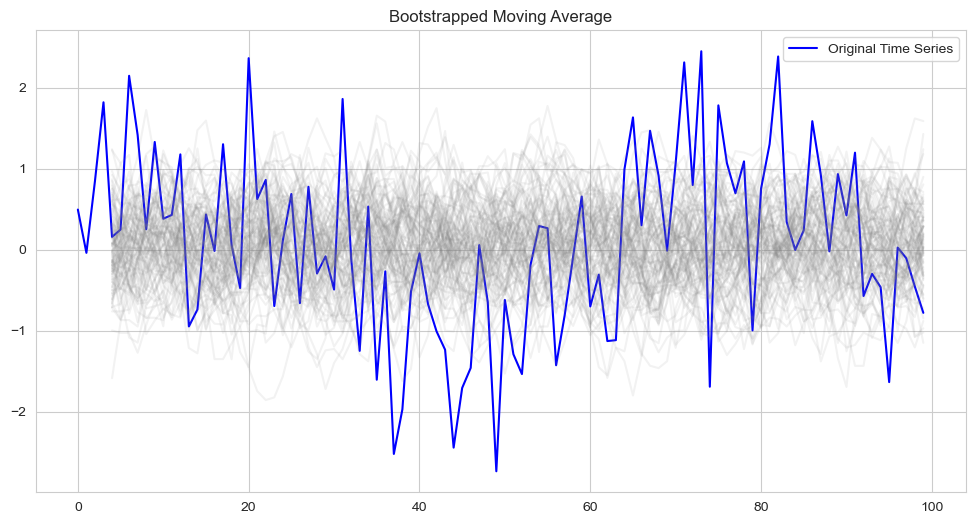

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulated Time Series Data
np.random.seed(42)
time_series = np.random.normal(size=100) + np.sin(np.linspace(0, 10, 100))

# Function for Bootstrapping Moving Average
def bootstrap_ma(series, window=5, n_iterations=100):
    results = []
    for _ in range(n_iterations):
        # Generate a bootstrap sample
        bootstrap_sample = np.random.choice(series, size=len(series), replace=True)
        # Apply moving average on the bootstrap sample
        ma = pd.Series(bootstrap_sample).rolling(window=window).mean().values
        results.append(ma)
    return np.vstack(results)

# Run Bootstrapping
bootstrap_results = bootstrap_ma(time_series)

# Plot Original and Bootstrapped Results
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series', color='blue')
plt.plot(bootstrap_results.T, color='gray', alpha=0.1)
plt.title('Bootstrapped Moving Average')
plt.legend()
plt.show()


In [208]:
# Calculate Daily Returns
tatamotors_valid['Daily_Return'] = tatamotors_valid['VWAP'].pct_change()

# Calculate Risk (Standard Deviation of Daily Returns)
risk = tatamotors_valid['Daily_Return'].std()

# Calculate Average Daily Return
avg_daily_return = tatamotors_valid['Daily_Return'].mean()

# Calculate Sharpe Ratio
sharpe_ratio = (avg_daily_return / risk) * np.sqrt(252)

# Print Results
print("Risk (Standard Deviation of Daily Returns):", risk)
print("Sharpe Ratio:", sharpe_ratio)


Risk (Standard Deviation of Daily Returns): nan
Sharpe Ratio: nan


In [209]:
import numpy as np
from scipy.optimize import differential_evolution

# Function to optimize (objective function)
def objective_function(params):
    # Extract parameters
    param1, param2, param3 = params
    
    # Your strategy logic here with adjusted parameters
    tatamotors_valid['Signal'] = ...  # Modify your signal generation logic
    
    # Calculate Daily Returns
    tatamotors_valid['Daily_Return'] = tatamotors_valid['VWAP'].pct_change().shift(-1)
    
    # Calculate Risk (Standard Deviation of Daily Returns)
    risk = tatamotors_valid['Daily_Return'].std()

    # Calculate Average Daily Return
    avg_daily_return = tatamotors_valid['Daily_Return'].mean()

    # Calculate Sharpe Ratio
    sharpe_ratio = (avg_daily_return / risk) * np.sqrt(252)
    
    # Minimize the negative Sharpe ratio
    return -sharpe_ratio

# Define parameter bounds for optimization
bounds = [(1, 10), (5, 20), (0.01, 0.2)]  # Adjust the parameter ranges

# Perform optimization
result = differential_evolution(objective_function, bounds, maxiter=100)

# Extract optimal parameters
optimal_params = result.x

# Print the results
print("Optimal Parameters:", optimal_params)
print("Optimal Sharpe Ratio:", -result.fun)


Optimal Parameters: [ 2.64803032 14.4687888   0.05646921]
Optimal Sharpe Ratio: nan


In [220]:
from sklearn.ensemble import RandomForestRegressor

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor for feature importance
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_


In [227]:
# Calculate volatility as a measure of risk
tatamotors_valid['Volatility'] = tatamotors_valid['Daily_Return'].rolling(window=20).std()

# Adjust position size based on volatility
tatamotors_valid['Position_Size'] = 1 / tatamotors_valid['Volatility']


In [228]:
import numpy as np
from sklearn.utils.multiclass import type_of_target

# Assuming 'y' is a NumPy array
print("Type of 'y':", type(y))



Type of 'y': <class 'pandas.core.series.Series'>


Empty DataFrame
Columns: [Daily_Return, Strategy_Returns, Cumulative_Returns]
Index: []


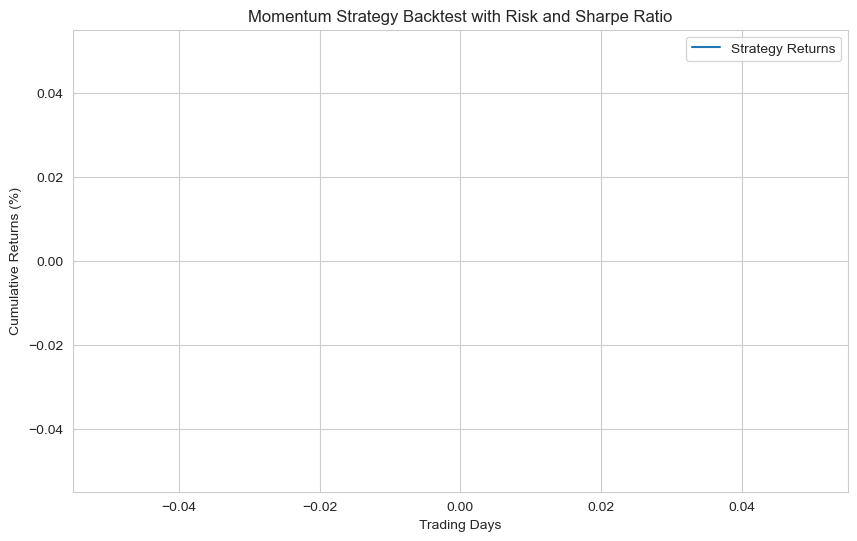

Empty DataFrame
Columns: [Date, Symbol, Series, Prev Close, Open, High, Low, Last, Close, VWAP, Volume, Turnover, Trades, Deliverable Volume, %Deliverble, High_mean_lag3, High_mean_lag7, High_mean_lag30, High_std_lag3, High_std_lag7, High_std_lag30, Low_mean_lag3, Low_mean_lag7, Low_mean_lag30, Low_std_lag3, Low_std_lag7, Low_std_lag30, Volume_mean_lag3, Volume_mean_lag7, Volume_mean_lag30, Volume_std_lag3, Volume_std_lag7, Volume_std_lag30, Turnover_mean_lag3, Turnover_mean_lag7, Turnover_mean_lag30, Turnover_std_lag3, Turnover_std_lag7, Turnover_std_lag30, Trades_mean_lag3, Trades_mean_lag7, Trades_mean_lag30, Trades_std_lag3, Trades_std_lag7, Trades_std_lag30, month, week, day, day_of_week, Daily_Return, Signal, Volatility, Position_Size, Strategy_Returns, Cumulative_Returns]
Index: []

[0 rows x 55 columns]
Risk (Standard Deviation of Daily Returns): nan
Average Daily Return: nan
Sharpe Ratio: nan


In [232]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Calculate the strategy returns based on signals
tatamotors_valid['Strategy_Returns'] = tatamotors_valid['Turnover'].copy() * tatamotors_valid['Daily_Return'].copy()

# Drop rows with NaN values in relevant columns
tatamotors_valid.dropna(subset=['Daily_Return', 'Strategy_Returns'], inplace=True)

# Print the first few rows to check the data
print(tatamotors_valid[['Daily_Return', 'Strategy_Returns', 'Cumulative_Returns']].head())

# Calculate Risk (Standard Deviation of Daily Returns)
risk = tatamotors_valid['Daily_Return'].std()

# Calculate Average Daily Return
avg_daily_return = tatamotors_valid['Daily_Return'].mean()

# Calculate Sharpe Ratio
sharpe_ratio = (avg_daily_return / risk) * np.sqrt(252)

# Calculate cumulative returns
tatamotors_valid['Cumulative_Returns'] = (1 + tatamotors_valid['Strategy_Returns']).cumprod() - 1

# Plot the cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(tatamotors_valid['Cumulative_Returns'] * 100, label='Strategy Returns')
plt.title('Momentum Strategy Backtest with Risk and Sharpe Ratio')
plt.xlabel('Trading Days')
plt.ylabel('Cumulative Returns (%)')
plt.legend()
plt.grid(True)
plt.show()
print(tatamotors_valid[tatamotors_valid[['Daily_Return', 'Strategy_Returns']].isna().any(axis=1)])

# Print Results
print("Risk (Standard Deviation of Daily Returns):", risk)
print("Average Daily Return:", avg_daily_return)
print("Sharpe Ratio:", sharpe_ratio)
